# <center>Online Petitioning Through Data Exploration and What We Found There: <br/>A Dataset of Petitions from Avaaz.org</center>

## 1. Set up

We import the libraries and read the CSV file of petitions crawled from Avaaz.org

In [1]:
import json
import pandas as pd
import numpy as np
import itertools
import operator
import powerlaw
import string
import sys
import math
from scipy.stats.stats import pearsonr
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline  

df = pd.read_csv('petitions.csv')
df.head()

,id,url,title,description,author,date,country_name,country_code,sign,target,...,facebook_count,twitter_count,whatsapp_count,email_count,lang_code,lang_prob,people,organizations,locations,miscellany
0,4,https://secure.avaaz.org/en/petition/max_test/,q,q,Christopher L.,2011-12-01T12:00:00Z,United Kingdom,GBR,1.0,100.0,...,0,0,0,0,sq,0.999993,NaN,NaN,NaN,NaN
1,16,https://secure.avaaz.org/en/petition/_916/,Burlington climate march!,more coming here soon,Christopher L.,2011-12-01T12:00:00Z,United Kingdom,GBR,1.0,100.0,...,0,0,0,0,en,0.999996,NaN,NaN,burlington,NaN
2,17,https://secure.avaaz.org/en/petition/_917/,Burlington climate march!,more coming here soon,Christopher L.,2011-12-01T12:00:00Z,United Kingdom,GBR,1.0,100.0,...,0,0,0,0,en,0.999996,NaN,NaN,burlington,NaN
3,18,https://secure.avaaz.org/en/petition/_1018/,Burlington climate march!,more coming here soon,Christopher L.,2011-12-01T12:00:00Z,United Kingdom,GBR,1.0,100.0,...,0,0,0,0,en,0.999994,NaN,NaN,burlington,NaN
4,19,https://secure.avaaz.org/en/petition/_1119/,Burlington climate march!,more coming here soon,Christopher L.,2011-12-01T12:00:00Z,United Kingdom,GBR,1.0,100.0,...,0,0,0,0,en,0.999994,NaN,NaN,burlington,NaN


## 2. General overview

### Distribution of authors by the number of petitions

The first plot shows the distribution of authors by the number of petitions. As expected, the distribution is a power law, indeed, most authors only published few petitions. However, there is a small group of authors with over 1,000 petitions each. We examined this group and found that the most prolific user (2,895 petitions) is named _selenium s._, located in Afghanistan and the United States, and authored petitions like _TEST - AUTOMATED - Who: TEST - AUTOMATED - What_ or _selenium1440423202: selenium1440423202_. This might indicate that these petitions were automatically generated with Selenium (http://www.seleniumhq.org), a popular browser automation tool. 

Although much recent research has been devoted to  characterize bots in social media platforms, most studies have focused on Twitter. To the best of our knowledge, this is the first evidence of bots operating in an online petition platform.

Calculating best minimal value for power law fit
/home/pablo.aragon/anaconda2/lib/python2.7/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


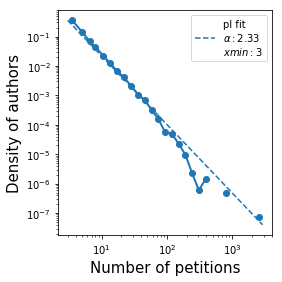

[('selenium s.', 2895), ('\xd9\x85\xd8\xad\xd9\x85\xd8\xaf .', 824), ('.', 718), ('\xd0\x90\xd0\xbb\xd0\xb5\xd0\xba\xd1\x81\xd0\xb0\xd0\xbd\xd0\xb4\xd1\x80 .', 400), ('\xd8\xa7\xd8\xad\xd9\x85\xd8\xaf .', 389), ('nan', 375), ('\xd0\xa1\xd0\xb5\xd1\x80\xd0\xb3\xd0\xb5\xd0\xb9 .', 325), ('adam q.', 249), ('\xd0\x90\xd0\xbd\xd0\xb4\xd1\x80\xd0\xb5\xd0\xb9 .', 226), ('\xd0\x95\xd0\xbb\xd0\xb5\xd0\xbd\xd0\xb0 .', 213)]


,id,url,title,description,author,date,country_name,country_code,sign,target,...,facebook_count,twitter_count,whatsapp_count,email_count,lang_code,lang_prob,people,organizations,locations,miscellany
254941,268112,https://secure.avaaz.org/en/petition/TEST_AUTO...,TEST - AUTOMATED - Who: TEST - AUTOMATED - What,test - automated - why,selenium s.,2014-12-05T12:00:00Z,Afghanistan,AFG,0.0,250.0,...,0,0,0,0,en,0.999997,NaN,NaN,NaN,NaN
254946,268117,https://secure.avaaz.org/en/petition/TEST_AUTO...,TEST - AUTOMATED - Who: TEST - AUTOMATED - What,test - automated - why,selenium s.,2014-12-05T12:00:00Z,Afghanistan,AFG,0.0,250.0,...,0,0,0,0,en,0.999998,NaN,NaN,NaN,NaN
254950,268121,https://secure.avaaz.org/en/petition/TEST_AUTO...,TEST - AUTOMATED - Who: TEST - AUTOMATED - What,test - automated - why,selenium s.,2014-12-05T12:00:00Z,Afghanistan,AFG,0.0,250.0,...,0,0,0,0,en,0.999997,NaN,NaN,NaN,NaN
256885,270058,https://secure.avaaz.org/en/petition/TEST_AUTO...,TEST - AUTOMATED - Who: TEST - AUTOMATED - What,test - automated - why,selenium s.,2014-12-08T12:00:00Z,Afghanistan,AFG,0.0,250.0,...,0,0,0,0,en,0.999997,NaN,NaN,NaN,NaN
256916,270089,https://secure.avaaz.org/en/petition/TEST_AUTO...,TEST - AUTOMATED - Who: TEST - AUTOMATED - What,test - automated - why,selenium s.,2014-12-08T12:00:00Z,Afghanistan,AFG,0.0,250.0,...,0,0,0,0,en,0.999999,NaN,NaN,NaN,NaN


In [2]:
fig = plt.figure(figsize=(4,4)) 
fontsize = 14

#subplot a
authors = Counter(df.apply(lambda x: x.astype(str).str.lower()).author)
authors_ranking = authors.most_common(len(authors))
authors_count = map(lambda x: x[1], authors_ranking)
fit = powerlaw.Fit(authors_count, discrete=True)
alpha = fit.alpha
xmin = fit.xmin
ax = fit.plot_pdf(linewidth=2, marker='o', color='#1f77b4')
fit.power_law.plot_pdf(linestyle='--', ax=ax, color='#1f77b4', label='pl fit\n' + r'$\alpha: $' + str(round(alpha, 2)) + '\n' + r'$xmin: $' + str(int(xmin)))
plt.ylabel('Density of authors', fontsize=15)
plt.xlabel('Number of petitions', fontsize=15)    
plt.legend(fontsize=10, loc=1)

fig.tight_layout()
plt.show()
fig.savefig('img/overview_authors.pdf', format='pdf')

#top active authors
print authors.most_common(10)
df[(df.author.str.lower() == 'selenium s.')].head()

### Target vs signatures

To assess the success of petitions in our dataset, we present a scatter plot of target versus signatures. These dimensions are not correlated and the plot reveals that the number of signatures rarely exceeds the expected target. 

Correlation -9.77412213179e-05 0.952864647622


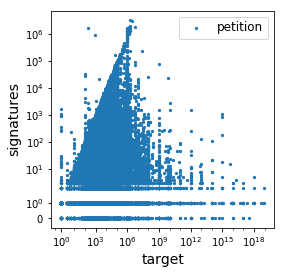

In [3]:
fig = plt.figure(figsize=(4,4)) 
fontsize = 14

#subplot b
valid_petitions = df[(df.sign>=0.0) & (df.target>=0.0)]
x = map(float,valid_petitions.target)
y = map(float,valid_petitions.sign)
corr = pearsonr(x,y)
print 'Correlation' , corr[0], corr[1]
fit = np.polyfit(x, y, deg=1)
yfit = [fit[1] + fit[0] * xi for xi in x]
plt.scatter(x,y, s=5)
plt.xlabel('target', fontsize=fontsize)
plt.ylabel('signatures', fontsize=fontsize)
plt.xscale('symlog', fontsize=fontsize)
plt.yscale('symlog', fontsize=fontsize)
plt.xticks([math.pow(10, 0), math.pow(10, 3), math.pow(10, 6), math.pow(10, 9), math.pow(10, 12), math.pow(10, 15), math.pow(10, 18)])
plt.legend(['petition'], fontsize=12, loc=1)
plt.show()
fig.tight_layout()
fig.savefig('img/overview_scatter.png', format='png')

### Distribution of petitions by ratio

This finding is explicit in the following plot of the distribution of petitions by ratio, i.e., the number of signatures divided by target. We should note that, although the fraction of petitions decreases when the ratio increases, this is not the case for petitions with ratio $\in [0.5, 1]$. 

The observed peak might be the result of the automatic update of target  when the number of signatures reaches a specific threshold. This is a relevant design feature in some online petition platforms that could encourage more signatures by magnifying the importance of a new signature to reach the target. 


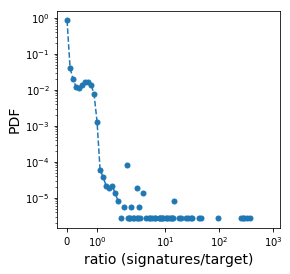

In [4]:
fig = plt.figure(figsize=(4,4)) 
fontsize = 14

#subplot c
valid_petitions = df[(df.sign>=0.0) & (df.target>=0.0)]
data = valid_petitions.ratio
y,x = np.histogram(data, map(lambda x: x/10.0, range(0,int(max(data)+2),1)))
plt.plot(x[:len(x)-1] ,(y)*1.0/sum(y), 'o', color='#1f77b4', markersize=5)
plt.plot(x[:18] ,y[:18]*1.0/sum(y), '--', color='#1f77b4', markersize=1)
plt.yscale('log', fontsize=fontsize)
plt.xscale('symlog', fontsize=fontsize)
plt.xlabel('ratio (signatures/target)', fontsize=fontsize)
plt.ylabel('PDF', fontsize=fontsize)
plt.show()
fig.tight_layout()
fig.savefig('img/overview_ratio.pdf', format='pdf')

### Cumulative distribution of petitions by signatures for petitions with ratio $\in [0.5, 1]$

We finally present the cumulative distribution of petitions by number of signatures for those with ratio $\in [0.5, 1]$. The plot shows two trends: one from 1 to 99 signatures and the other from 100 signatures, default initial target, i.e., when automatic updates of target are most likely to occur. 

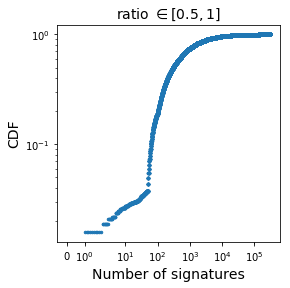

In [5]:
fig = plt.figure(figsize=(4,4)) 
fontsize = 14

#subplot d
data = df[(df.ratio>=0.5) & (df.ratio<=1.0)].sign
y,x = np.histogram(data, map(lambda x: x/10.0, range(0,int(max(data)+2),1)))
y = y*1.0/y.sum()
yc = np.cumsum(y)
plt.plot(x[:len(x)-1] , yc, 'o', markersize=2.5)
plt.yscale('log', fontsize=fontsize)
plt.xscale('symlog', fontsize=fontsize)
plt.xlabel('Number of signatures', fontsize=fontsize)
plt.ylabel('CDF', fontsize=fontsize)
plt.title(r'ratio $\in [0.5, 1]$', fontsize=fontsize)
plt.show()
fig.tight_layout()
fig.savefig('img/overview_ratio051_cdf.png', format='png')

## 3. The link between social media campaigning and the success of online petitions

Recent research has confirmed that the growth and success of online petitions can be explained through their popularity in social media. Given that our dataset includes how many times each petition was shared on Facebook, Twitter, WhatsApp and email, we present the distribution of petitions by number of shares in each platform. Plots show heavy-tailed distributions: most petitions are not shared in social platforms while a few are highly shared. This is consistent with previous studies of diffusion in social media.


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/pablo.aragon/anaconda2/lib/python2.7/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


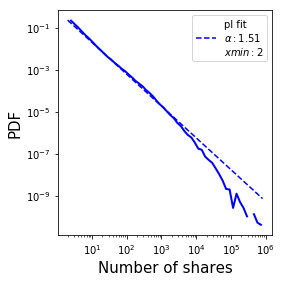

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


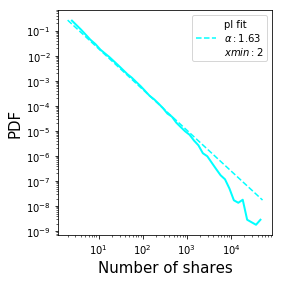

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


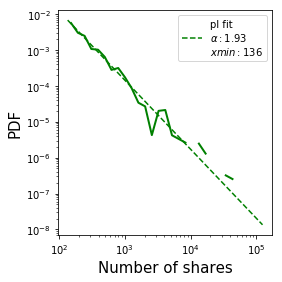

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


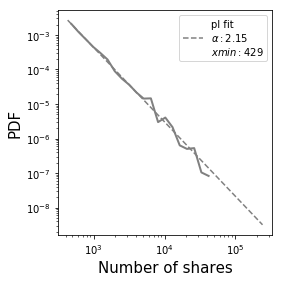

In [6]:
social_media = [df.facebook_count,df.twitter_count,df.whatsapp_count,df.email_count]
labels = ['Facebook','Twitter','WhatsApp','email']
colors = ['blue','cyan','green','gray']

for i in range(4):
    fig = plt.figure(figsize=(4,4)) 
    fit = powerlaw.Fit(social_media[i], discrete=True)
    alpha = fit.alpha
    xmin = fit.xmin
    ax = fit.plot_pdf(color=colors[i], linewidth=2)
    fit.power_law.plot_pdf(color=colors[i], linestyle='--', ax=ax, label='pl fit\n' + r'$\alpha: $' + str(round(alpha, 2)) + '\n' + r'$xmin: $' + str(int(xmin)))
    plt.ylabel('PDF', fontsize=15)
    plt.xlabel('Number of shares', fontsize=15)    
    plt.legend(fontsize=10, loc=1)
    fig.tight_layout()
    plt.show()
    fig.savefig('img/'+labels[i].lower()+'.pdf', format='pdf')

### Signatures versus shares in social media

We explicitly examine the link between social media and the success of online petitions with a scatter plot of signatures versus the sum of shares in the four social platforms (see first plot). Although both dimensions are positively correlated ($r=0.44, p < 0.001$), as better shown in the second plot, we find of great interest the existence of a group of 25 petitions that received more than 500K signatures but less than 100 shares.

Correlation 0.436532282226 True


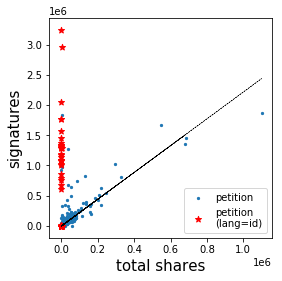

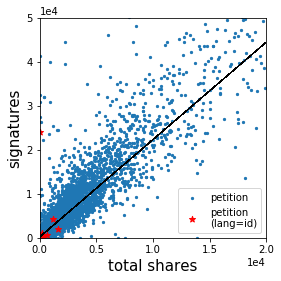

In [7]:
fig = plt.figure(figsize=(8,4)) 

df_indonesian =df[(df.lang_code=='id')]
valid_petitions = df[(df.sign>=0.0)]
x = map(float,valid_petitions.facebook_count+valid_petitions.twitter_count+valid_petitions.whatsapp_count+valid_petitions.email_count)
y = map(float,valid_petitions.sign)

xlim = 20000
ylim = 50000

corr = pearsonr(x,y)
print 'Correlation' , corr[0], corr[1]<0.001

fit = np.polyfit(x,y, deg=1)
yfit = [fit[1] + fit[0] * xi for xi in x]

df_indonesian =df[(df.lang_code=='id')]
x_indonesian = map(float,df_indonesian.facebook_count+df_indonesian.twitter_count+df_indonesian.whatsapp_count+df_indonesian.email_count)
y_indonesian = map(float,df_indonesian.sign)

for i in range(2):
    fig = plt.figure(figsize=(4,4)) 
    plt.scatter(x,y, s=5)
    plt.scatter(x_indonesian,y_indonesian, marker='*', s=40, color='red')
    plt.xlabel('total shares', fontsize=15)
    plt.ylabel('signatures', fontsize=15)
    plt.legend(['petition','petition\n(lang=id)'], fontsize=10, loc=4)
    plt.ticklabel_format(style='sci', axis='both', scilimits=(0,3))
    plt.plot(x, yfit, color='black', linestyle='--', linewidth=0.5)     
    if i==1:
        plt.xlim((0,xlim))
        plt.ylim((0,ylim))
    fig.tight_layout()
    plt.show()
    fig.savefig('img/scatter_sign_shares_'+str(i)+'.png', format='png')

We inspected these petitions and found that 24 of them were written in Indonesian by 18 authors not located in Indonesia but in the United Kingdom, the United States, Spain, France, Italy, Costa Rica and Palestinian territories. Using the _author_ field (given name and the initial of the family name), we checked on the Google search engine: _site:linkedin.com avaaz name_. 

For every query, we found an employee of _Avaaz.org_ (e.g., Campaign Directors, Senior Campaigners) matching with _name_ and the geographical location of corresponding petitions. We provide two possible explanations for these results. On the one hand, they could be an indicator of astroturfing, i.e., these petitions were massively signed in an artificial manner. We should note that, there are specific complaints about the reliability of support numbers to petitions from Avaaz.org. On the other hand, blocking websites like _Avaaz.org_ has been a common practice in Indonesia in recent years. Therefore, this finding could be the result of very effective campaigns through alternative (even non-digital) diffusion channels.


In [8]:
df[(df.sign > 500000) & (df.facebook_count+df.twitter_count+df.whatsapp_count < 100)][['title','lang_code','country_code','author']]

,title,lang_code,country_code,author
217704,Israel-Palestine: Akhiri Mimpi Buruk,id,GBR,Alice J.
227344,Petisi terpenting yang pernah kita luncurkan s...,id,USA,Ricken P.
284664,"Zona Aman bagi Suriah, Sekarang Juga!",id,USA,John T.
293576,Rahasia mematikan peternakan pabrik,id,GBR,Alex W.
295530,Mengatakan #ShellNo untuk Pengeboran Kutub Utara!,id,USA,David S.
302474,Negara mungil yang bisa menyelamatkan 150 paus...,id,GBR,Lisa V.
304120,Hentikan skandal pasar swalayan,id,GBR,Tristram S.
306777,Mereka mau menambang dimana?!,id,GBR,Alex W.
307380,Suku asli Amerika dikhianati lagi?,id,USA,Nick K.
308239,Sebelum dunia melupakan singa Cecil...,id,CRI,Mia C.


In [9]:
authors_specialpetitions = (df[(df.sign > 500000) & (df.facebook_count+df.twitter_count+df.whatsapp_count < 100) & (df.lang_code=='id')])['author']
Counter(authors_specialpetitions)

Counter({'Alex W.': 3,
         'Alice J.': 2,
         'Dalia H.': 2,
         'Danny A.': 2,
         'David S.': 1,
         'Fadi Q.': 1,
         'John T.': 1,
         'Lisa V.': 2,
         'Luca N.': 1,
         'Luis M.': 1,
         'Meredith A.': 1,
         'Mia C.': 1,
         'Nataliya R.': 1,
         'Nick K.': 1,
         'Rewan H.': 1,
         'Riccardo D.': 1,
         'Ricken P.': 1,
         'Tristram S.': 1})

## 4. Geographical and multilingual findings in a worldwide community

### Choropleth workd maps 

Available [here](./maps) The map of the total number of signatures for all petititions in the dataset and reveals that activity is intense in Brazil, countries members of the Group of Seven (G7) excluding Japan (Canada, United States, United Kingdom, France, Italy, and Germany), and Spain. These results are similar to the map of number of members from each country at the [Avaaz Annual 2016 Poll](https://secure.avaaz.org/es/poll_results_2016/).

In contrast, the map of the average number of signatures per petition and depicts a very different distribution with the highest values in two African countries, Uganda and Kenya, followed by Indonesia.

In [10]:
countries = Counter(df.apply(lambda x: x.astype(str)).country_code)
countries_ranking = countries.most_common(len(countries))
countries_petitions = {}

#Petitions
file = open('maps/data/country_petitions.csv','w') 
file_log10 = open('maps/data/country_petitions_log.csv','w') 
file.write('Country Code,Value\n')
file_log10.write('Country Code,Value\n')
for c in countries_ranking:
    country = c[0]
    petitions = c[1]    
    file.write(country+','+str(petitions)+'\n')
    file_log10.write(country+','+str(np.log10(petitions))+'\n')
    countries_petitions[country] = petitions
file.close()
file_log10.close()

df_cp = pd.read_csv('csv/country_population.csv')

country_sign = df.groupby(['country_code']).sum().sign
country_sign_keys = country_sign.keys()

file = open('maps/data/country_sign.csv','w') 
file_normed = open('maps/data/country_sign_normed.csv','w') 
file_log10 = open('maps/data/country_sign_log_10.csv','w') 
file_ratio = open('maps/data/country_sign_per_petition.csv','w') 
file.write('Country Code,Value\n')
file_normed.write('Country Code,Value\n')
file_log10.write('Country Code,Value\n')
file_ratio.write('Country Code,Value\n')
i=0
for cs in country_sign:
    country = country_sign_keys[i]
    file.write(country+','+str(cs)+'\n')
    file_normed.write(country+','+str(cs*1.0/int(df_cp[df_cp.country_code==country].population))+'\n')
    file_log10.write(country+','+str(np.log10(cs))+'\n')
    file_ratio.write(country+','+str(cs/countries_petitions[country])+'\n')    
    i=i+1
file.close()    
file_normed.close()    
file_log10.close()    
file_ratio.close()   

print 'done!'

done!


### Heatmap of percentage of petitions from different countries written in the most popular languages

To examine which are the most popular languages in _Avaaz.org_ petitions from very active countries, we present a heatmap. For better readability, data are normalized by the number of petitions of each country, and countries on the horizontal axis are grouped by linguistic clusters. We observe that, although users tend to use the most popular language of their country, English acts as a global language with an remarkable use in countries like Afghanistan, Poland or the Netherlands. 

Results also allow to easily identify countries with multilingual communities, e.g., Canada (French and English), Argelia (French and Arab), Morocco (French and Arab), Ukrania (Russian and Ukranian), Belgium (French, Dutch and English) and Turkey (Turkish, Arab and English). 

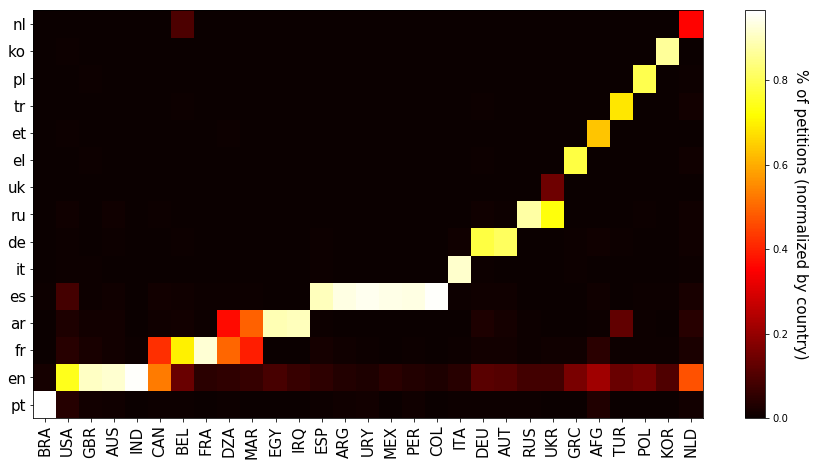

In [11]:
langs = Counter(df.apply(lambda x: x.astype(str)).lang_code)
top_langs = ['pt' ,'en' ,'fr' ,'ar' ,'es' ,'it' ,'de' ,'ru' ,'uk' ,'el' ,'et' ,'tr' ,'pl' ,'ko','nl']
top_countries = ['BRA' ,'USA' ,'GBR' ,'AUS' ,'IND' ,'CAN' ,'BEL' ,'FRA' ,'DZA' , 'MAR', 'EGY' ,'IRQ' ,'ESP' ,'ARG', 'URY','MEX' ,'PER' ,'COL', 'ITA' ,'DEU' ,'AUT' ,'RUS' ,'UKR' ,'GRC' ,'AFG' ,'TUR' ,'POL' ,'KOR' ,'NLD']

file = open('csv/heatmap_country_langs.csv','w') 
head='Country'
for lang_code in top_langs:
    head=head+','+lang_code
file.write(head+'\n')
for country_code in top_countries:
    row = country_code
    for lang_code in top_langs:
        row=row+','+str(1.0*len(df[(df.country_code==country_code)&(df.lang_code==lang_code)])/len(df[(df.country_code==country_code)]))
    file.write(row+'\n')
file.close()

df_cl = pd.read_csv('csv/heatmap_country_langs.csv', index_col=0)
df_cl_norm = df_cl.values
fig, ax = plt.subplots()
heatmap = ax.pcolor(df_cl_norm.transpose(), cmap=plt.cm.hot)
fig.set_size_inches(15, 7.5)
ax.set_xticks(np.arange(df_cl_norm.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_cl_norm.shape[1]) + 0.5, minor=False)
ax.set_xticklabels(top_countries)
ax.set_yticklabels(top_langs)
plt.xticks(rotation=90)
cbar = plt.colorbar(heatmap)
cbar.set_label('% of petitions (normalized by country)', rotation=270, labelpad=20, fontsize=15)    
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
plt.show()
fig.savefig('img/heatmap_lang_country.pdf', format='pdf')

### Heatmap of number people who are named in petitions of two countries

We finally explore named people within the text of petitions. As indicated in the second section, this exploration is limited to petitions written in English, Spanish or German. 

The table shows the top 10 people by the number of countries with petitions naming them, together with the top 3 countries of each person. Because petitions in _Avaaz.org_ are aimed to solve global societal challenges, it was expected to find people associated to global leadership like Barack Obama or Angela Merkel. Besides politicians, we find of interest the presence of Justin Bieber because of petitions from Latin American countries like Argentina, Uruguay and Mexico. We inspected these petitions and found that many of them were about the indictment of the Argentinian court against him in 2016. 

This led us to examine which countries share similar political and social references with a heatmap of the number of people in common between the most active English, Spanish or German speaking countries. Besides the overlap among very active countries in _Avaaz.org_ (United States, United Kingdom, Germany, Canada and Spain), we should note the specific overlap among Spanish speaking countries (Spain, Mexico, Colombia, Argentina, Venezuela, etc.) and between United States and Mexico.


Person	No. of countries	Top 3 countries
Barack Obama	85	USA (173)	DEU (34)	GBR (34)
Boris Johnson	70	GBR (60)	USA (14)	ARG (9)
Angela Merkel	44	DEU (264)	AUT (14)	GRC (10)
Barak Obama	42	USA (21)	ESP (6)	GBR (5)
Vladimir Putin	41	USA (18)	GBR (14)	RUS (11)
David Cameron	41	GBR (471)	FRA (7)	USA (5)
Edward Snowden	31	DEU (65)	GBR (14)	USA (14)
Ban Ki-Moon	31	DEU (10)	USA (9)	CHE (9)
Justin Bieber	29	ARG (30)	URY (19)	MEX (11)
Ban Ki Moon	28	GBR (6)	IND (4)	MEX (3)


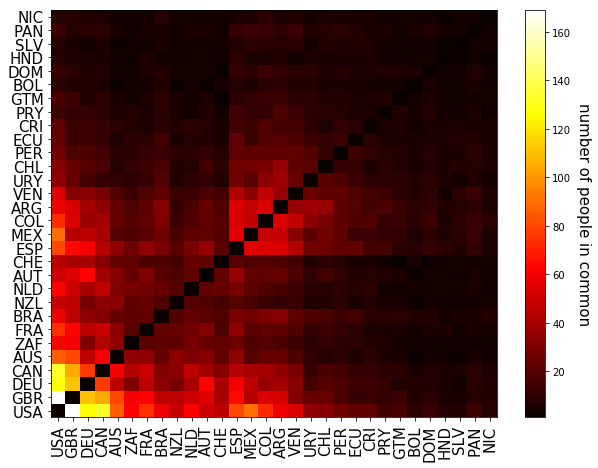

In [12]:
df_people = df[df['people'].notnull()]
person_countries = {}
person_countries_repeated = {}
person_countries_count = {}
for index, row in df_people.iterrows():
    people = row['people'].split(',')
    country = str(row['country_code'])
    for person in people:
        if ' ' in person:
            if person not in person_countries:
                person_countries_repeated[person] = [country]
                person_countries[person] = [country]
                person_countries_count[person] = 1
            else:
                person_countries_repeated[person].append(country)
                if not country in person_countries[person]:
                    person_countries[person].append(country)
                    person_countries_count[person] = person_countries_count[person]+1

print 'Person\tNo. of countries\tTop 3 countries'
people_ranking = sorted(person_countries_count.items(), key=operator.itemgetter(1), reverse=True)
for i in range(10):
    pr = people_ranking[i]
    sys.stdout.write(pr[0].title()+'\t'+str(pr[1]))
    top3 = (Counter(person_countries_repeated[pr[0]])).most_common(3)
    for t in top3:
        sys.stdout.write('\t'+t[0]+' ('+str(t[1])+')')
    sys.stdout.write('\n')    
    
    
top_countries = ['USA', 'GBR', 'DEU', 'CAN', 'AUS', 'ZAF', 'FRA', 'BRA', 'NZL', 'NLD', 'AUT', 'CHE', 'ESP', 'MEX', 'COL', 'ARG', 'VEN', 'URY', 'CHL', 'PER', 'ECU', 'CRI', 'PRY', 'GTM', 'BOL', 'DOM', 'HND', 'SLV', 'PAN', 'NIC']
countries_peopleincommon = np.ones((len(top_countries),len(top_countries)))
for person in person_countries:
    countries = person_countries[person] 
    if len(countries)>1:
        country_pairs = list(itertools.combinations(countries, 2))
        for pair in country_pairs:
            if pair[0] in top_countries and pair[1] in top_countries:
                c1 = pair[0]
                c2 = pair[1]
                countries_peopleincommon[top_countries.index(c1),top_countries.index(c2)] = 1 + countries_peopleincommon[top_countries.index(c1),top_countries.index(c2)]
                countries_peopleincommon[top_countries.index(c2),top_countries.index(c1)] = 1 + countries_peopleincommon[top_countries.index(c2),top_countries.index(c1)]

fig, ax = plt.subplots()
heatmap = ax.pcolor(countries_peopleincommon, cmap=plt.cm.hot)
fig.set_size_inches(10,7.5)
ax.set_xticks(np.arange(countries_peopleincommon.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(countries_peopleincommon.shape[1]) + 0.5, minor=False)
ax.set_xticklabels(top_countries)
ax.set_yticklabels(top_countries)
plt.xticks(rotation=90)
cbar = plt.colorbar(heatmap)
cbar.set_label('number of people in common', rotation=270, labelpad=20, fontsize=15)    
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
plt.show()
fig.savefig('img/heatmap_people.pdf', format='pdf')